In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#to ignore the warning messages
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
#loading the data in python environment
data_sal = pd.read_csv("salarydata.csv")

In [4]:
#displaying the dataframe
data_sal.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
# Understanding the data set

In [6]:
#checking the shape (no.of rows and columns ) of the dataframe
data_sal.shape

(32561, 14)

In [7]:
#checking the statistical summary od the dataframe
data_sal.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456
std,13.640433,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [8]:
#information of the data
data_sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  32561 non-null  object
 13  salary          32561 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


In [9]:
#data types of the fields
data_sal.dtypes

age                int64
workclass         object
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary            object
dtype: object

In [10]:
# Checking the null values 
data_sal.isnull().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [11]:
#Checking for number of  unique values
data_sal.nunique()

age                73
workclass           9
education          16
education-num      16
marital-status      7
occupation         15
relationship        6
race                5
sex                 2
capital-gain      119
capital-loss       92
hours-per-week     94
native-country     42
salary              2
dtype: int64

In [12]:
#Checking the unique values
for i in data_sal.columns:
    print(i)
    print(data_sal[i].unique())
    print("-"*50)
    print("\n")

age
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
--------------------------------------------------


workclass
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
--------------------------------------------------


education
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
--------------------------------------------------


education-num
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
--------------------------------------------------


marital-status
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
--------------------------------------------------


oc

In [13]:
#we can see that there are some special characters in the data like ‘?’.
#Finding the special characters in the data
data_sal.isin(['?']).sum(axis=0)

age                  0
workclass         1836
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

In [14]:
#Handling missing values
# the code will replace the special character to nan  
data_sal['workclass'] = data_sal['workclass'].replace('?',np.nan)
data_sal['occupation'] = data_sal['occupation'].replace('?',np.nan)
data_sal['native-country'] = data_sal['native-country'].replace('?',np.nan)

In [15]:
# after repalcing checking the null values
data_sal.isnull().sum()

age                  0
workclass         1836
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

In [16]:
#Filling the null values
data_sal['occupation'] = data_sal['occupation'].fillna(data_sal['occupation'].mode()[0])
data_sal['native-country'] = data_sal['native-country'].fillna(data_sal['native-country'].mode()[0])
data_sal['workclass'] = data_sal['workclass'].fillna(data_sal['workclass'].mode()[0])

In [17]:
#Checking for the null values present
data_sal.isnull().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [18]:
# Checking value counts
for i in data_sal.columns:
    print(data_sal[i].value_counts())
    print("-"*50)
    print("\n")

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: age, Length: 73, dtype: int64
--------------------------------------------------


Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
--------------------------------------------------


HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64
--------------------------------------------------


9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12 

In [19]:
# checking for duplicates 
data_sal.duplicated().sum()

3591

In [20]:
#data_sal.shape data_sal['marital-status']=data_sal['marital-status']

In [21]:
#data_sal.education= data_sal.education.replace(['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th','10th', '11th', '12th'], 'school')

<AxesSubplot:>

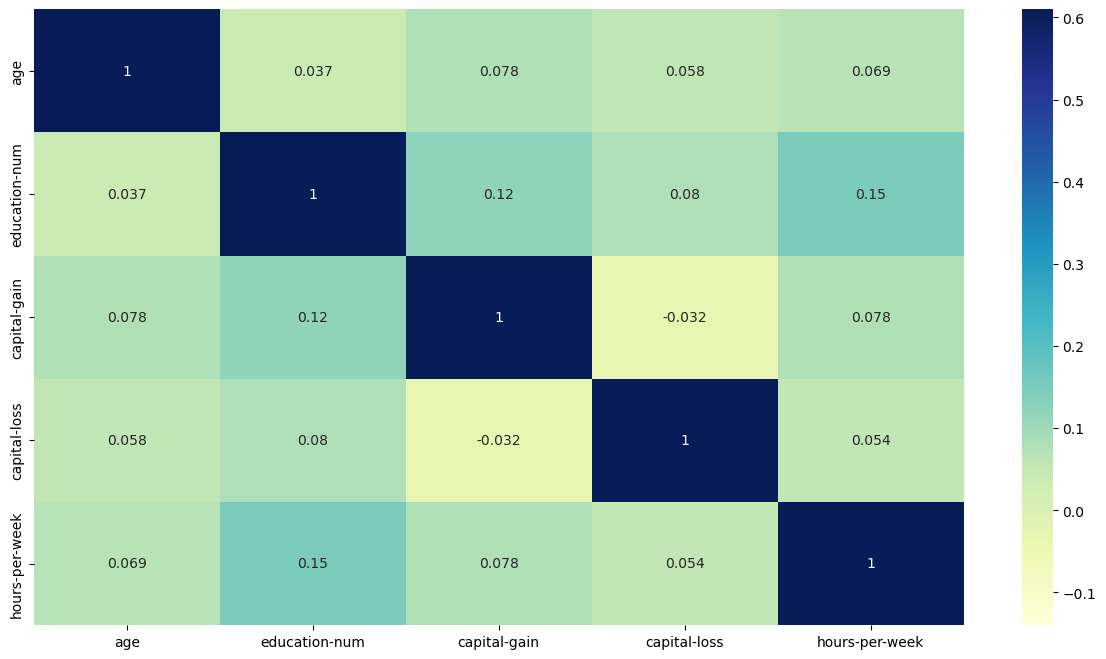

In [22]:
# checking the correlation by plotting correlation matrix
corr_matrix=data_sal.corr()
plt.subplots(figsize=(15,8))
sns.heatmap(corr_matrix,annot=True,vmin=-0.14,vmax=0.61,cmap='YlGnBu')

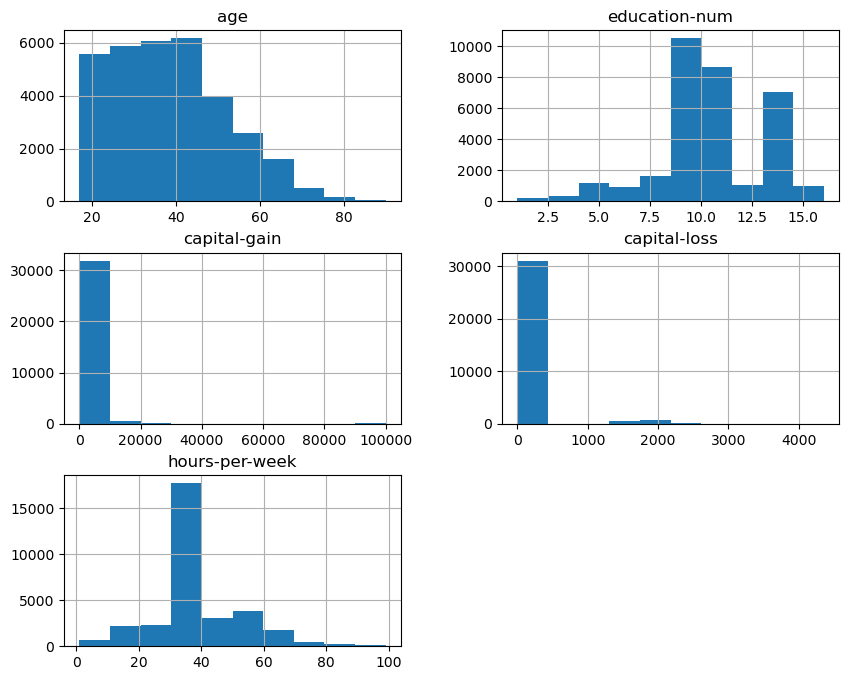

In [23]:
# Ploting for frequency graph
freqgraph = data_sal.select_dtypes(include=['int'])

freqgraph.hist(figsize=(10,8))

plt.show()

In [24]:
# Maximum value in hours-per-week
data_sal['hours-per-week'].max()

99

In [25]:
# Maximum values in age
data_sal['age'].max()

90

# Explorartory Data Analysis

### Uni-Variate Analysis

In [26]:
data_sal.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'salary'],
      dtype='object')

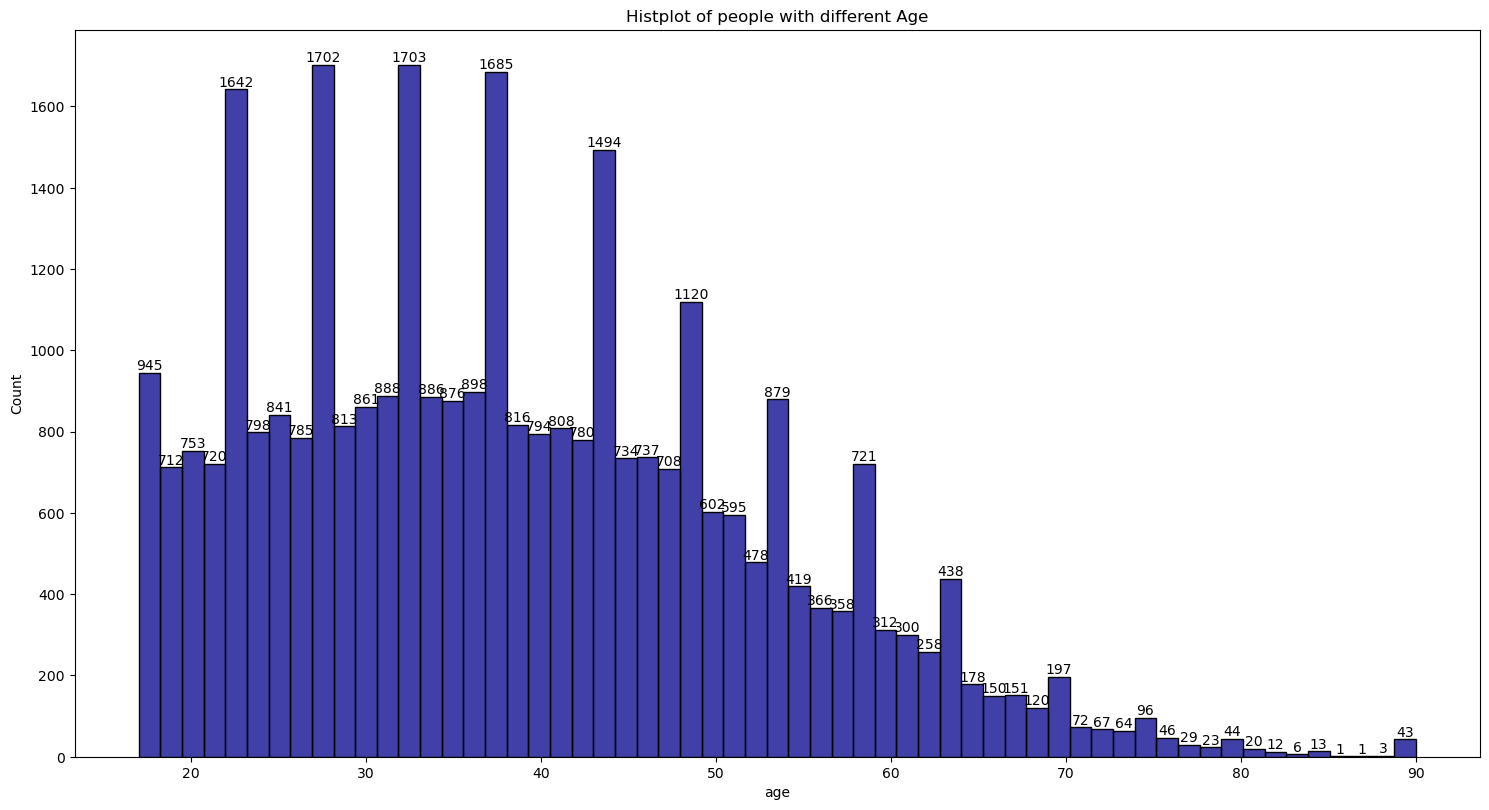

In [27]:
plt.figure(figsize=(15,8))
ax=sns.histplot(data_sal['age'],color='darkblue')
for p in ax.patches: 
    ax.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()), ha='center', va='center', xytext=(0,5),textcoords='offset points')
plt.tight_layout()
plt.title('Histplot of people with different Age')
plt.show()

In [28]:
#we are defining a function for count plot
def labeled_countplot(a):
  ax=sns.countplot(x=data_sal[a])
  total = len(data_sal)
  for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.2f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()/2
    ax.annotate(percentage, (x,y), ha='center', va='center')
  plt.tight_layout()
  plt.show()
  return

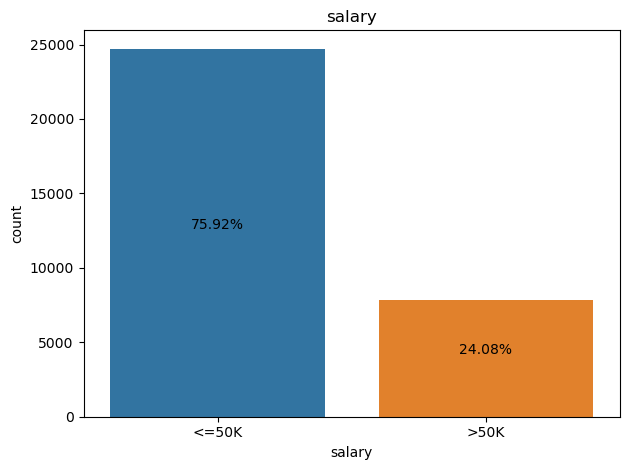

In [29]:
plt.title('salary')
labeled_countplot('salary')

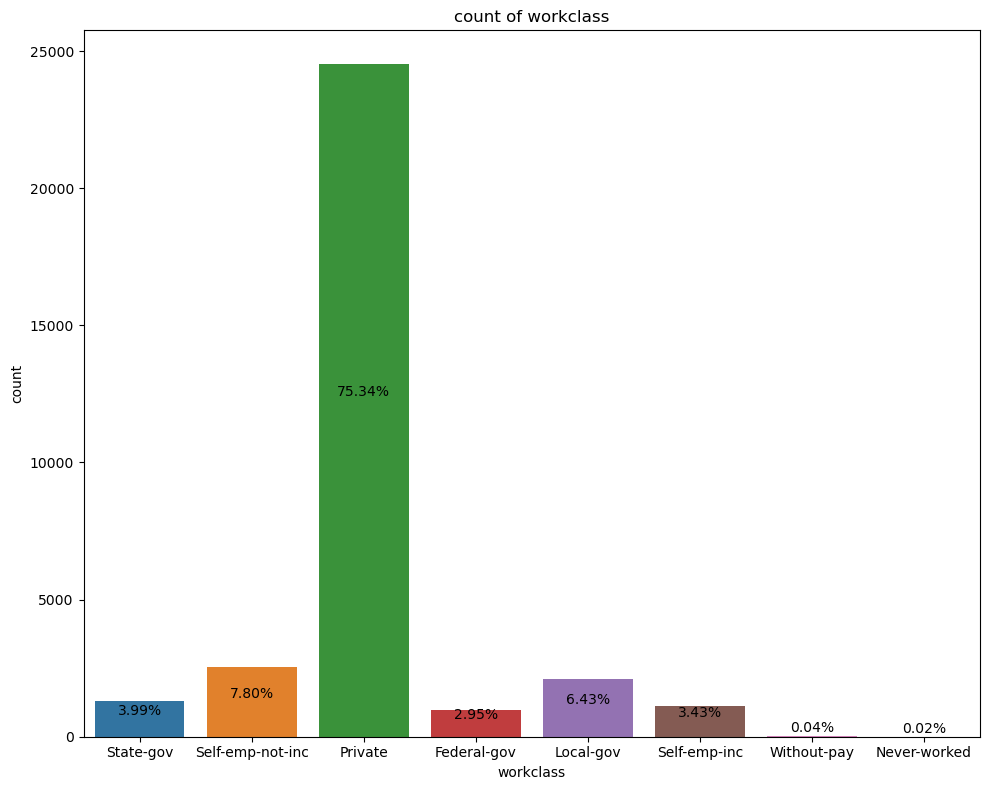

In [30]:
plt.figure(figsize=(10,8))
plt.title('count of workclass')
labeled_countplot('workclass')

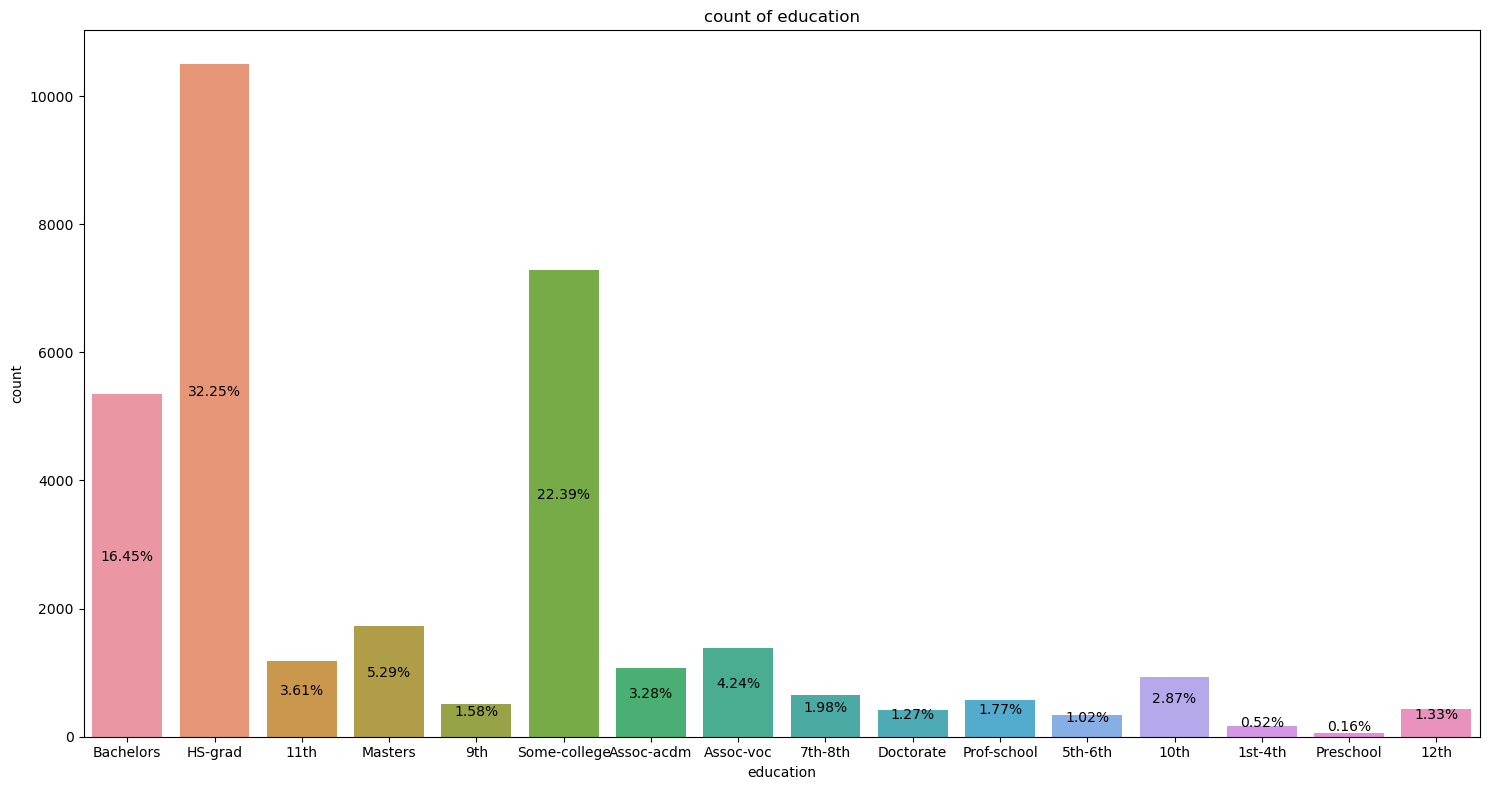

In [31]:
plt.figure(figsize=(15,8))
plt.title('count of education')
labeled_countplot('education')

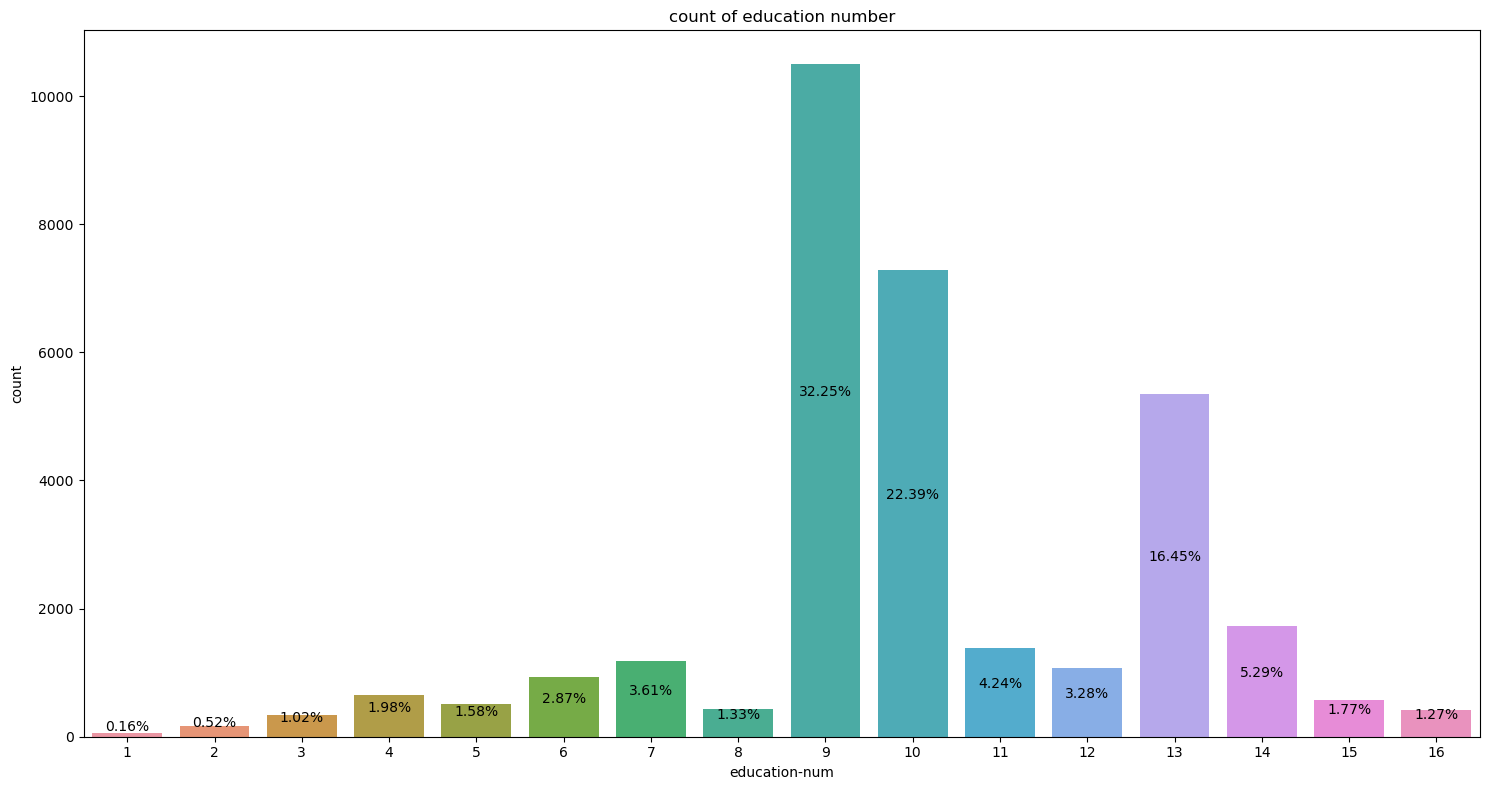

In [32]:
plt.figure(figsize=(15,8))
plt.title('count of education number')
labeled_countplot('education-num')

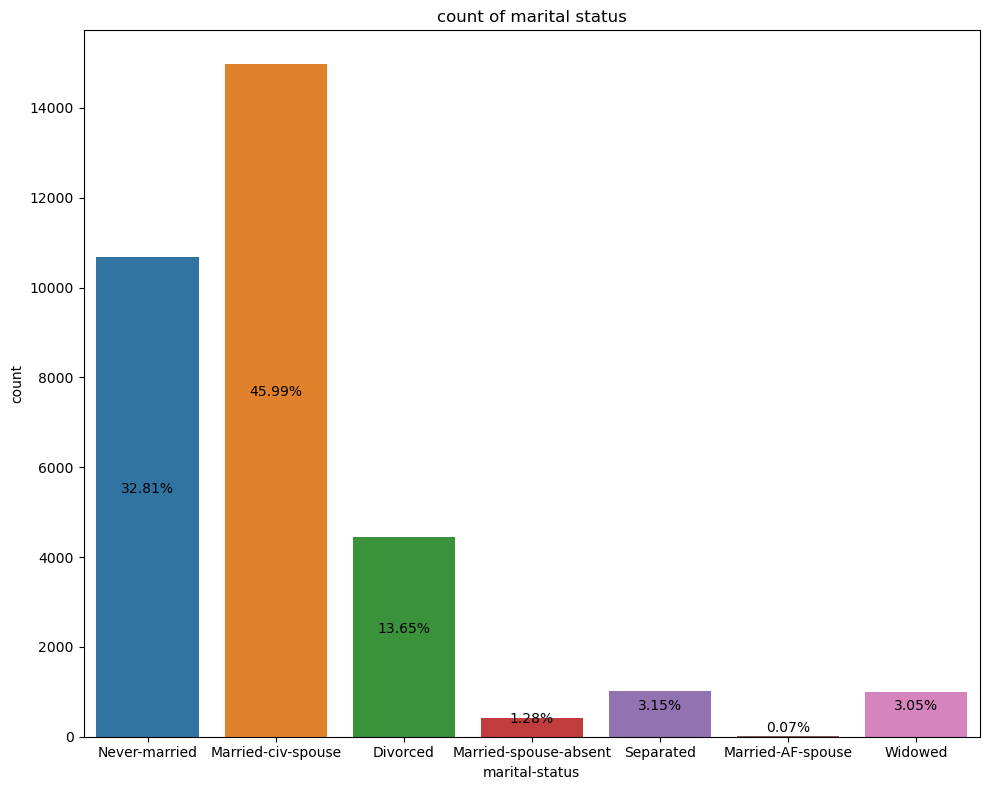

In [33]:
plt.figure(figsize=(10,8))
plt.title('count of marital status')
labeled_countplot('marital-status')

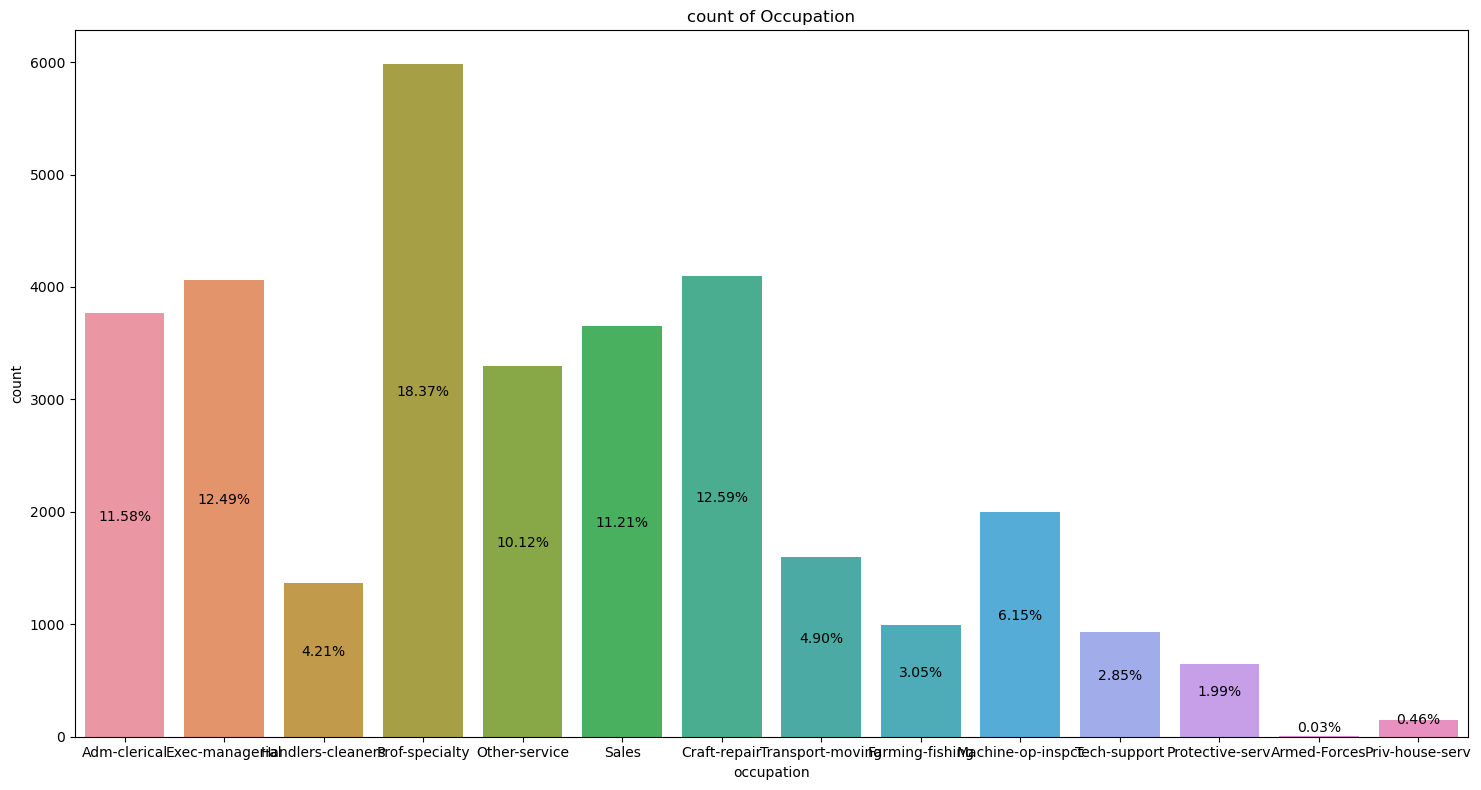

In [34]:
plt.figure(figsize=(15,8))
plt.title('count of Occupation')
labeled_countplot('occupation')

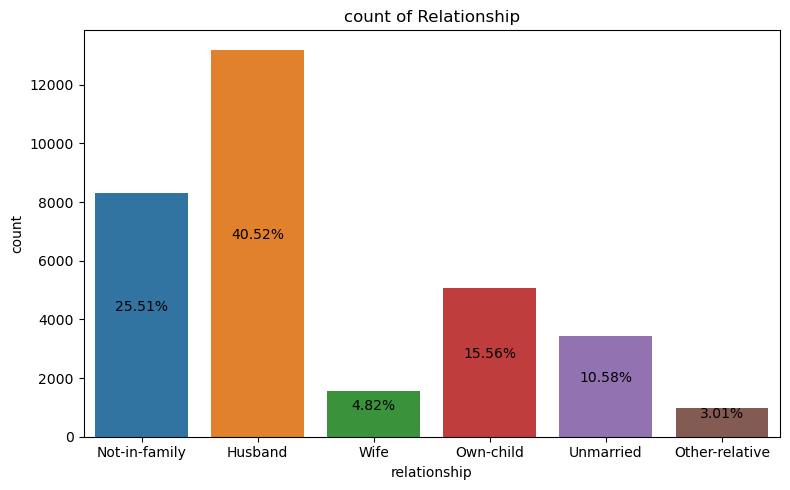

In [35]:
plt.figure(figsize=(8,5))
plt.title('count of Relationship')
labeled_countplot('relationship')

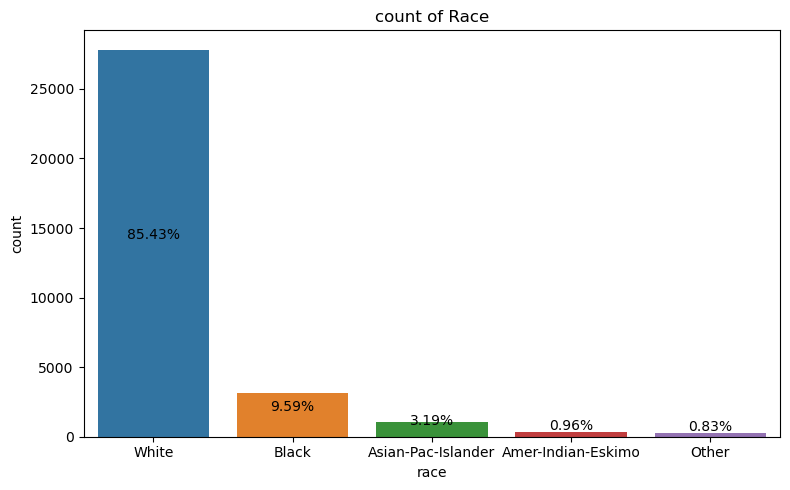

In [36]:
plt.figure(figsize=(8,5))
plt.title('count of Race')
labeled_countplot('race')

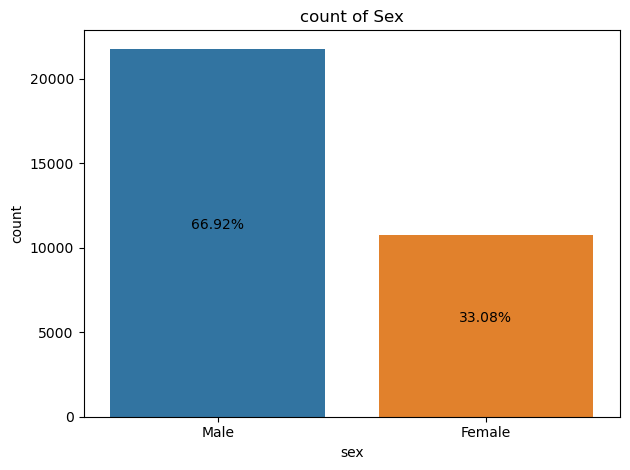

In [37]:
plt.title('count of Sex')
labeled_countplot('sex')

# Bivariate Analysis

In [38]:
def labeled_bar(a):
    sns.set(style="ticks")
    ax=sns.barplot(x=data_sal[a],y=data_sal['salary'],color='b')
    plt.grid(color='b',linewidth=0.3)
    plt.tight_layout()
    plt.show()
    return

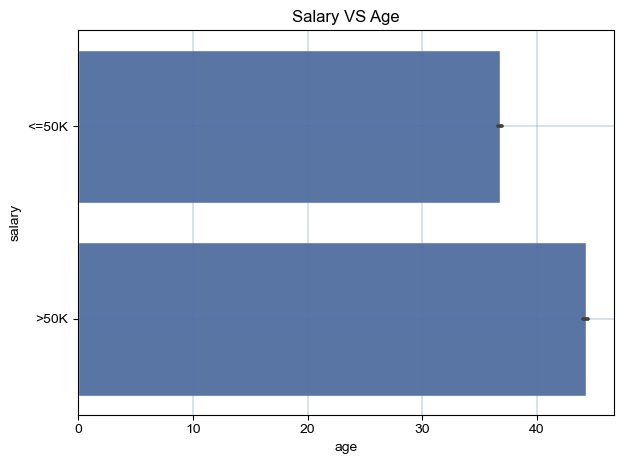

In [39]:
plt.title("Salary VS Age")
labeled_bar('age')

In [40]:
#for aed people salary is more

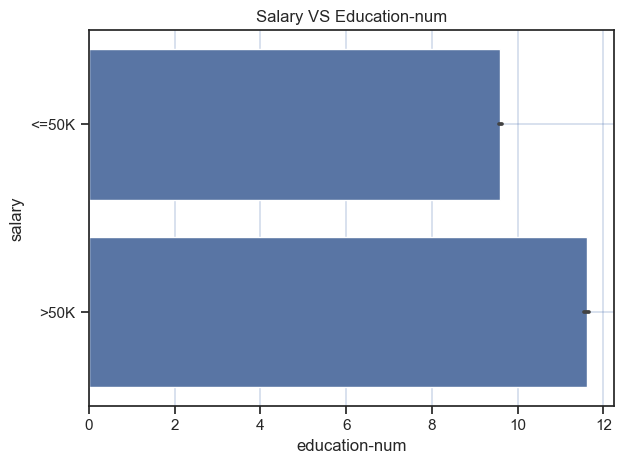

In [41]:
plt.title("Salary VS Education-num")
labeled_bar('education-num')

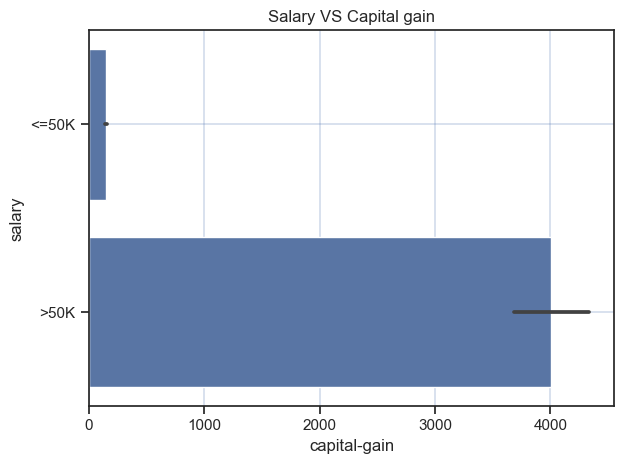

In [42]:
plt.title("Salary VS Capital gain")
labeled_bar('capital-gain')

In [43]:
#capital ain is more wen  salary more

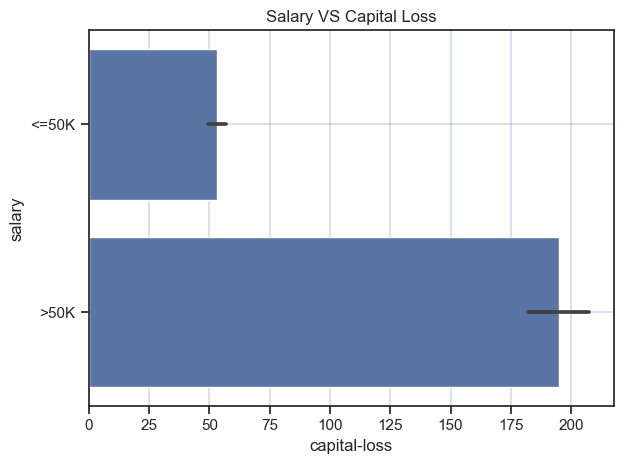

In [44]:
plt.title("Salary VS Capital Loss")
labeled_bar('capital-loss')

In [45]:
#capital loss is more wen  salary more

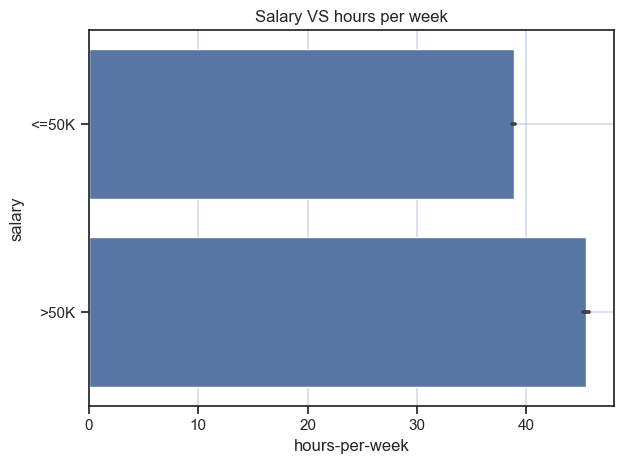

In [46]:
plt.title("Salary VS hours per week")
labeled_bar('hours-per-week')

<AxesSubplot:title={'center':'Salary VS Education'}, xlabel='education', ylabel='count'>

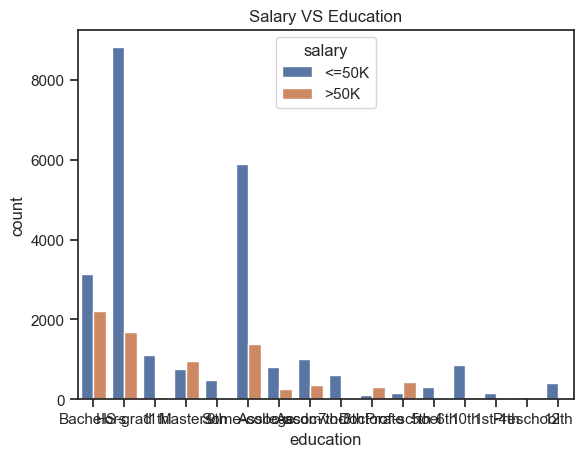

In [47]:
plt.title("Salary VS Education")
sns.countplot(x='education',hue='salary',data=data_sal)

<AxesSubplot:title={'center':'Salary VS Marital Status'}, xlabel='marital-status', ylabel='count'>

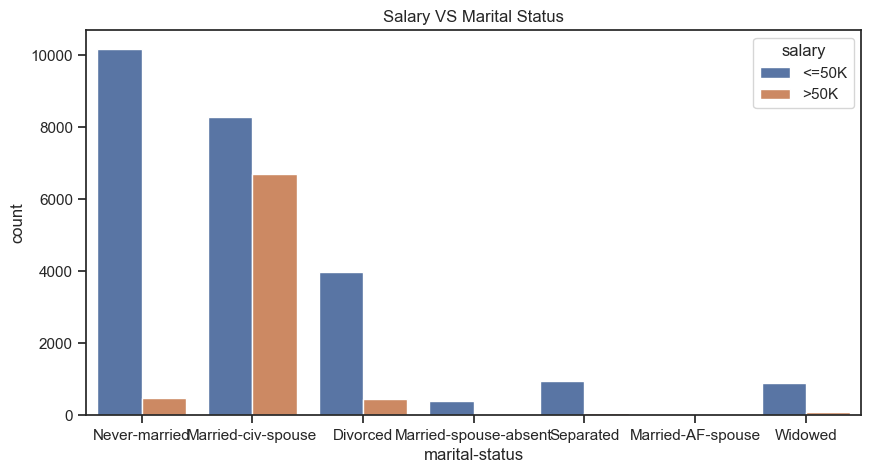

In [48]:
plt.figure(figsize=(10,5))
plt.title("Salary VS Marital Status")
sns.countplot(x='marital-status',hue='salary',data=data_sal)

<AxesSubplot:title={'center':'Salary VS Race'}, xlabel='race', ylabel='count'>

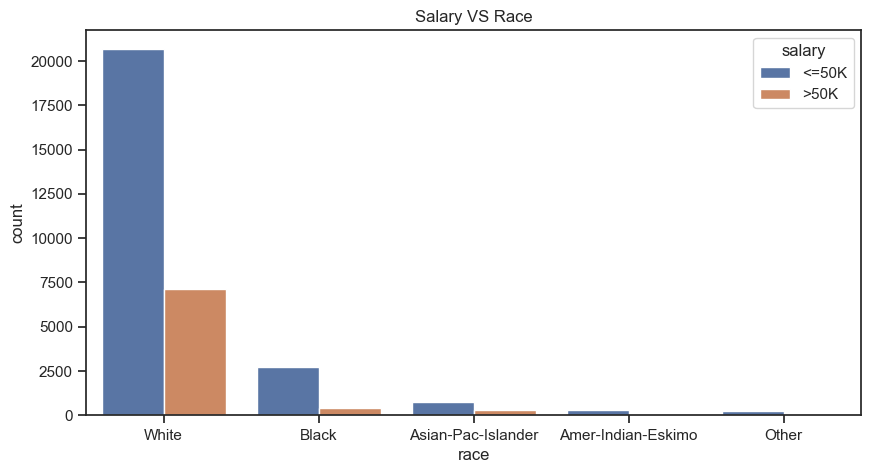

In [49]:
plt.figure(figsize=(10,5))
plt.title("Salary VS Race")
sns.countplot(x='race',hue='salary',data=data_sal)

<AxesSubplot:title={'center':'Salary VS occupation'}, xlabel='occupation', ylabel='count'>

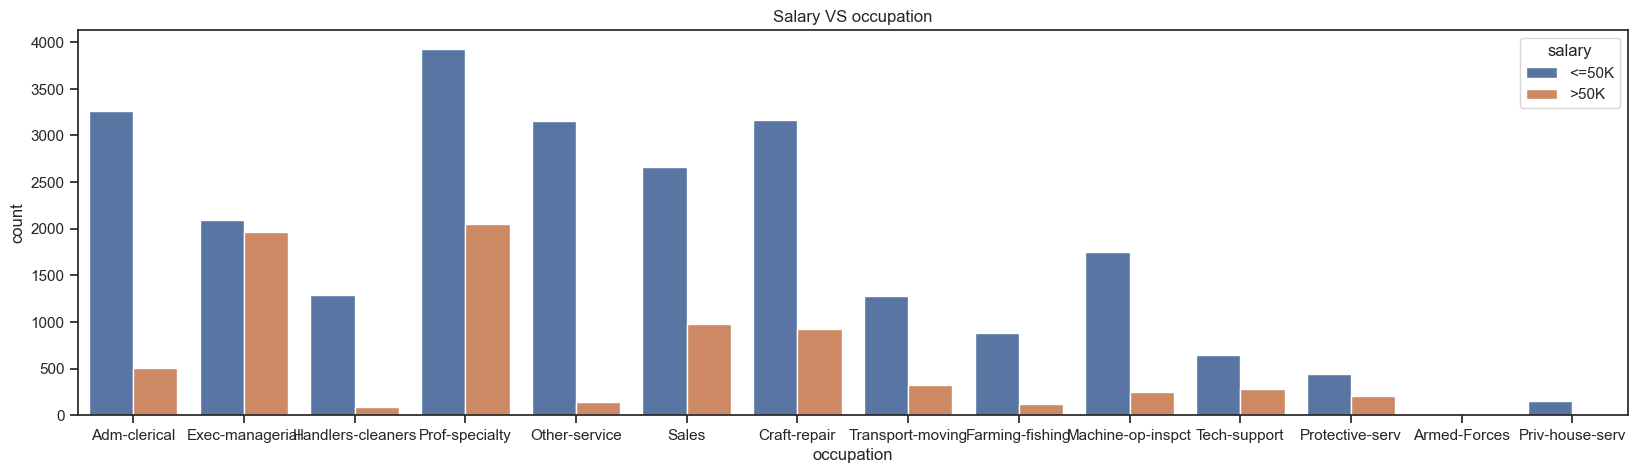

In [50]:
plt.figure(figsize=(20,5))
plt.title("Salary VS occupation")
sns.countplot(x='occupation',hue='salary',data=data_sal)

<AxesSubplot:title={'center':'Salary VS Sex'}, xlabel='sex', ylabel='count'>

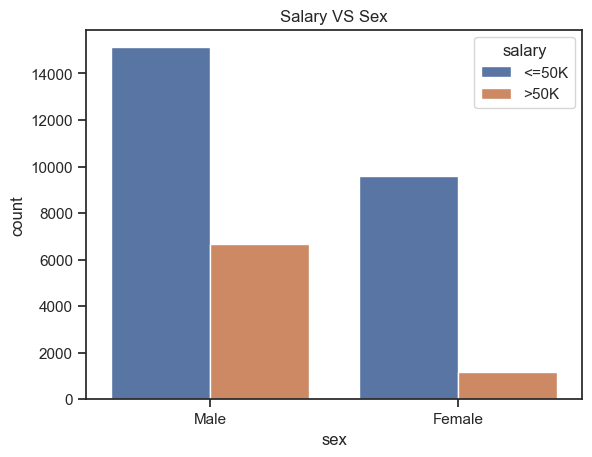

In [51]:
plt.title("Salary VS Sex")
sns.countplot(x='sex',hue='salary',data=data_sal)

<AxesSubplot:title={'center':'Salary VS Relationship'}, xlabel='relationship', ylabel='count'>

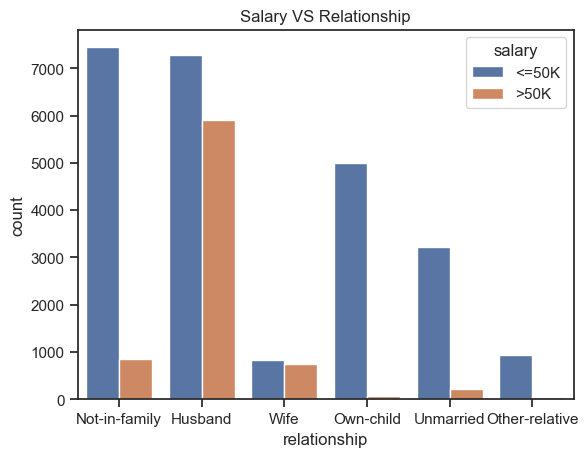

In [52]:
plt.title("Salary VS Relationship")
sns.countplot(x='relationship',hue='salary',data=data_sal)

<AxesSubplot:title={'center':'Salary VS workclass'}, xlabel='workclass', ylabel='count'>

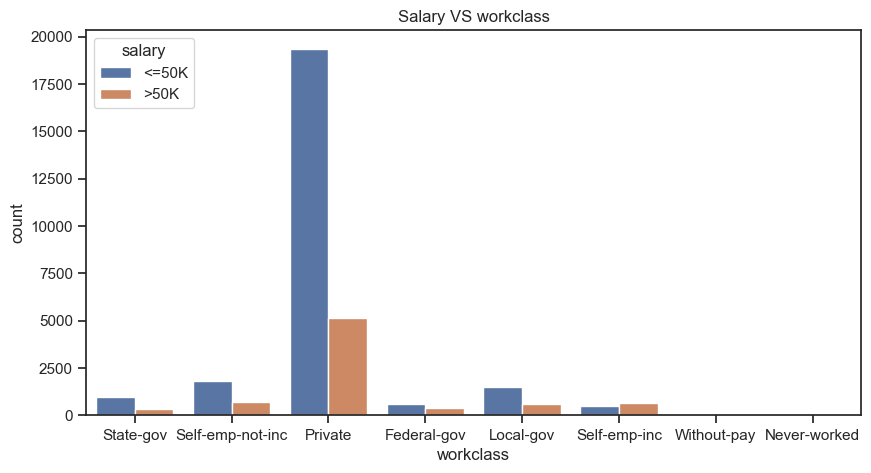

In [53]:
plt.figure(figsize=(10,5))
plt.title("Salary VS workclass")
sns.countplot(x='workclass',hue='salary',data=data_sal)

# multivariate Analysis

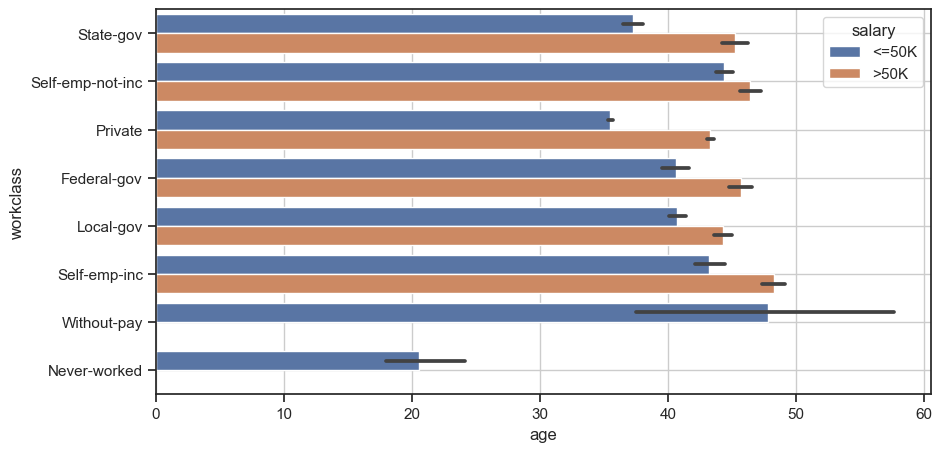

In [54]:
plt.figure(figsize=(10,5))
sns.barplot(x=data_sal['age'],y=data_sal['workclass'],hue=data_sal['salary'])
plt.grid()
plt.show()

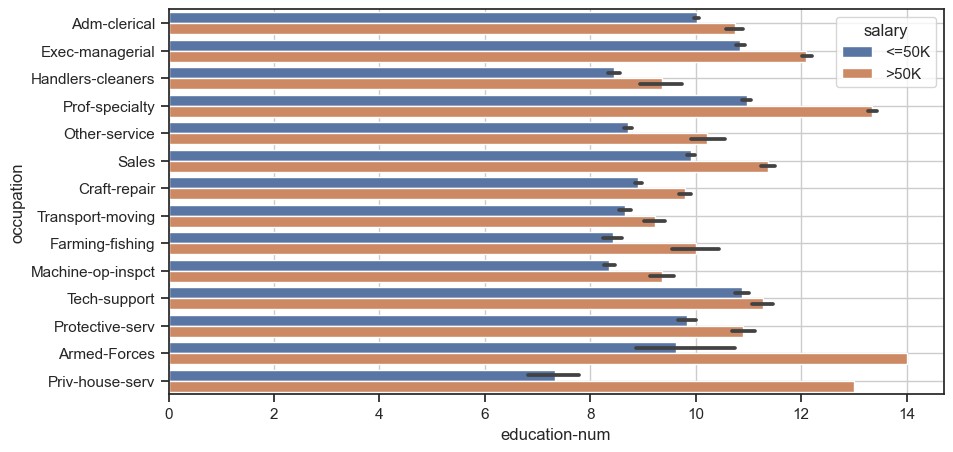

In [55]:
plt.figure(figsize=(10,5))
sns.barplot(x=data_sal['education-num'],y=data_sal['occupation'],hue=data_sal['salary'])
plt.grid()
plt.show()

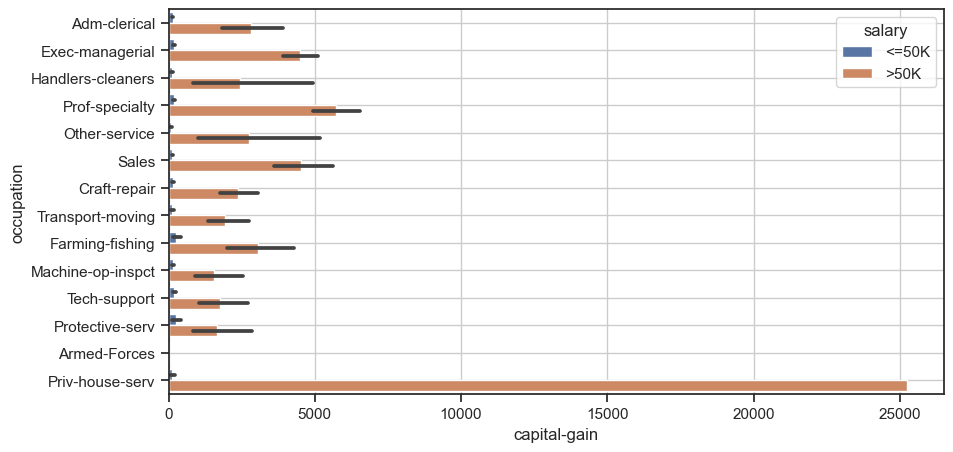

In [56]:
plt.figure(figsize=(10,5))
sns.barplot(x=data_sal['capital-gain'],y=data_sal['occupation'],hue=data_sal['salary'])
plt.grid()
plt.show()

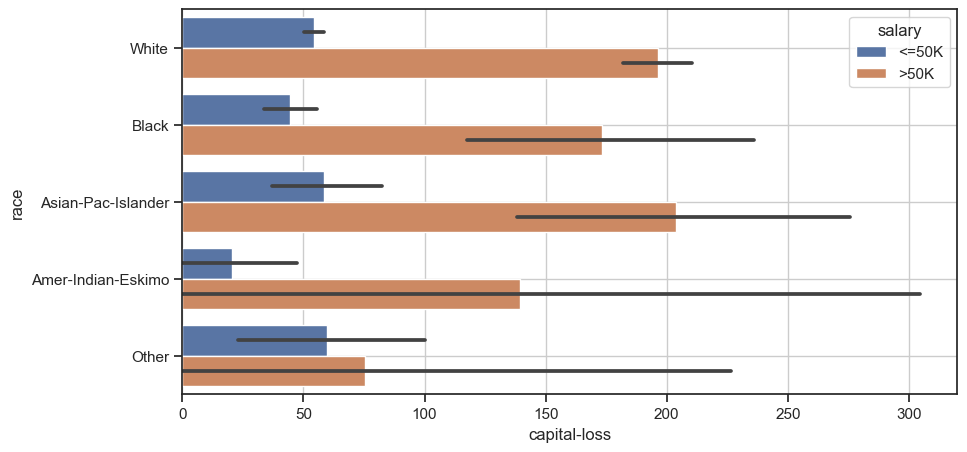

In [57]:
plt.figure(figsize=(10,5))
sns.barplot(x=data_sal['capital-loss'],y=data_sal['race'],hue=data_sal['salary'])
plt.grid()
plt.show()

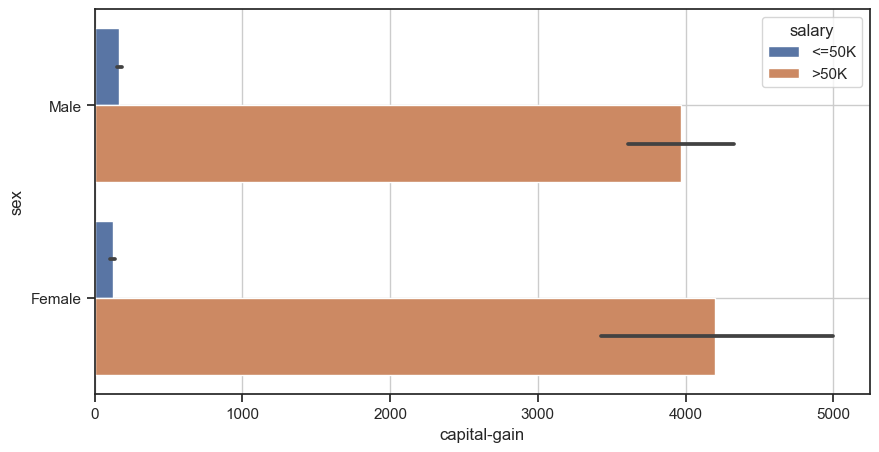

In [58]:
plt.figure(figsize=(10,5))
sns.barplot(x=data_sal['capital-gain'],y=data_sal['sex'],hue=data_sal['salary'])
plt.grid()
plt.show()

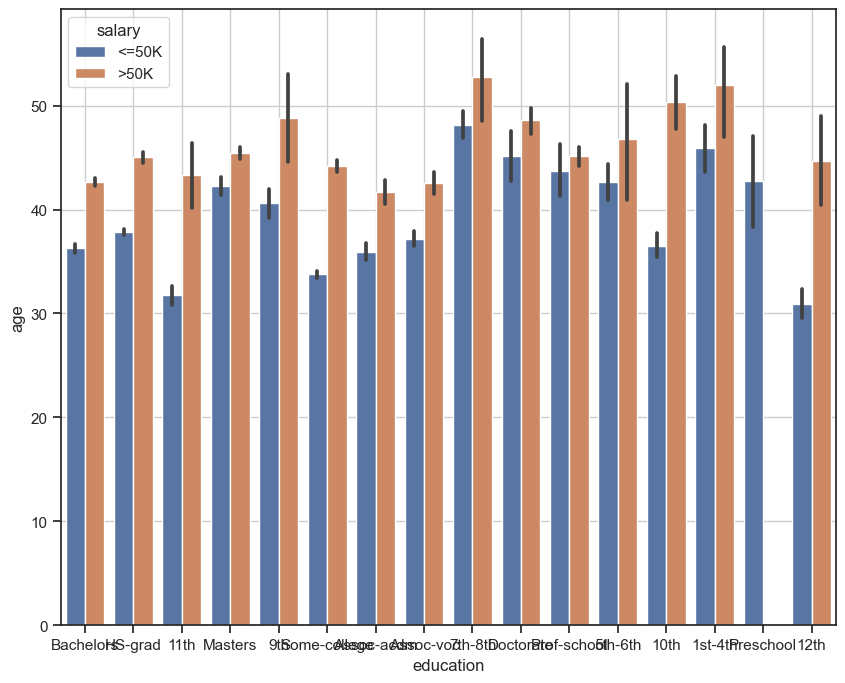

In [59]:
plt.figure(figsize=(10,8))
sns.barplot(x=data_sal['education'],y=data_sal['age'],hue=data_sal['salary'])
plt.grid()
plt.show()

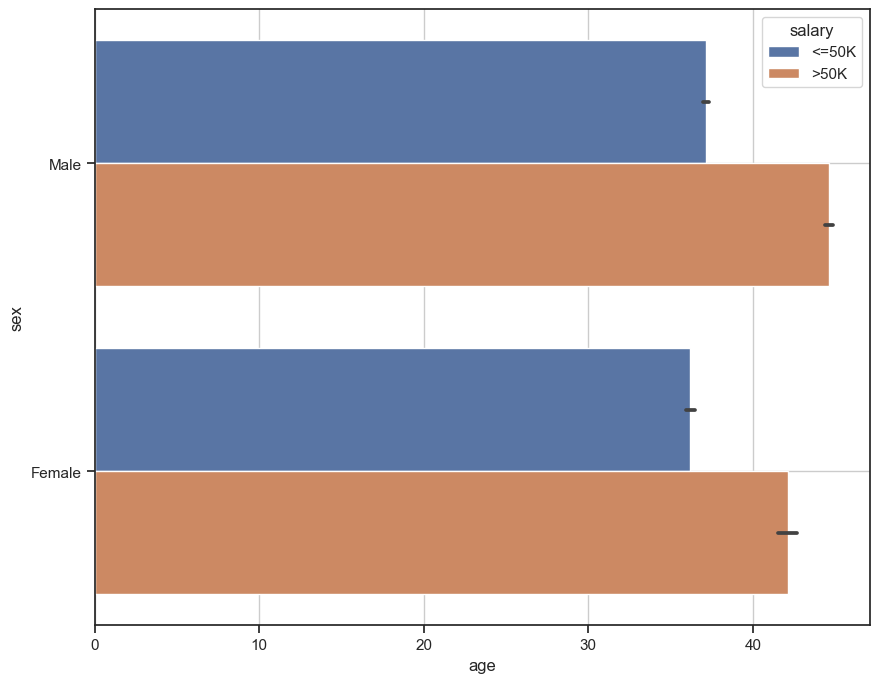

In [60]:
plt.figure(figsize=(10,8))
sns.barplot(x=data_sal['age'],y=data_sal['sex'],hue=data_sal['salary'])
plt.grid()
plt.show()

### Checking for outliers

In [61]:
data_sal_num = data_sal.select_dtypes(['number'])

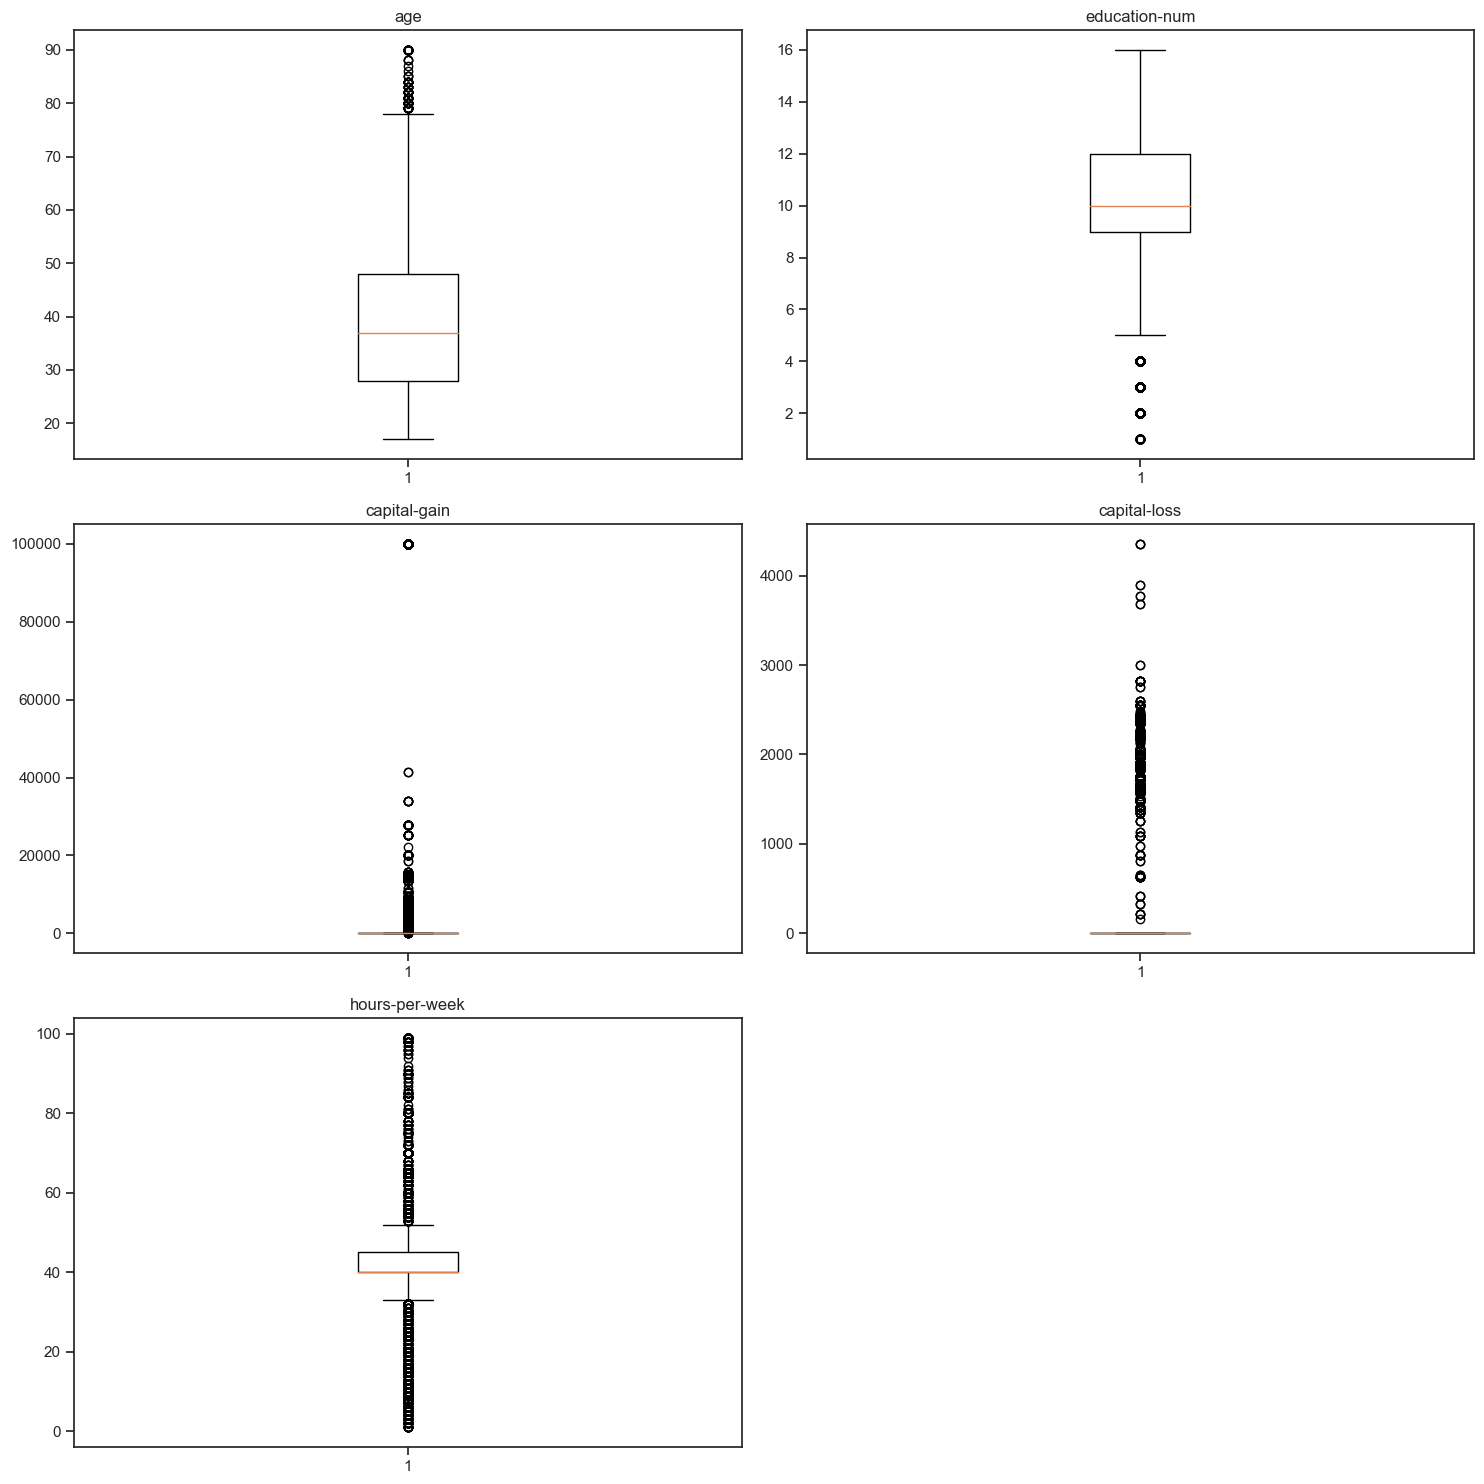

In [62]:
# Listing all mumerical value boxplots to find the outliers
#numerical_col = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(15,15))

for i, variable in enumerate(data_sal_num):
                     plt.subplot(3,2,i+1)
                     plt.boxplot(data_sal[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

In [63]:
#Outlier Handling for the attribute age
Q1=data_sal['age'].quantile(0.25) # 25th quantile
Q3=data_sal['age'].quantile(0.75)  # 75th quantile
IQR=Q3-Q1
Lower_Whisker = Q1 - 1.5*IQR 
Upper_Whisker = Q3 + 1.5*IQR
data_sal['age'] = np.clip(data_sal['age'], Lower_Whisker, Upper_Whisker) 
    # all the values smaller than Lower_Whisker will be assigned value of Lower_whisker 
    # and all the values above upper_whishker will be assigned value of upper_Whisker 


In [64]:
#checking the maximum value in the attribute duration of pitch
data_sal['age'].max()

78.0

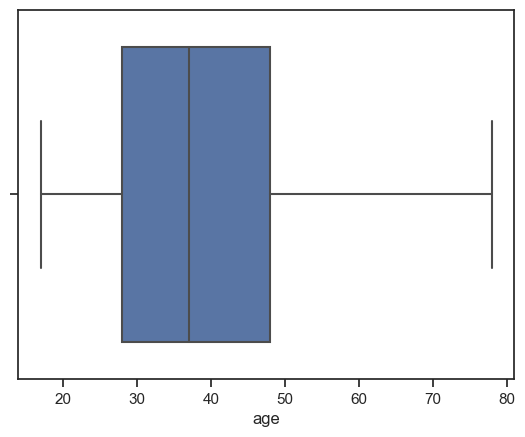

In [65]:
#checking whether the outliers are handled or not
sns.boxplot(data_sal['age'])
plt.show()

In [66]:
data_sal['salary']=data_sal['salary'].replace(to_replace=('<=50K'), value=0)
data_sal['salary']=data_sal['salary'].replace(to_replace=('>50K'), value=1)

In [67]:
data_sal['salary'].value_counts()

0    24720
1     7841
Name: salary, dtype: int64

<AxesSubplot:>

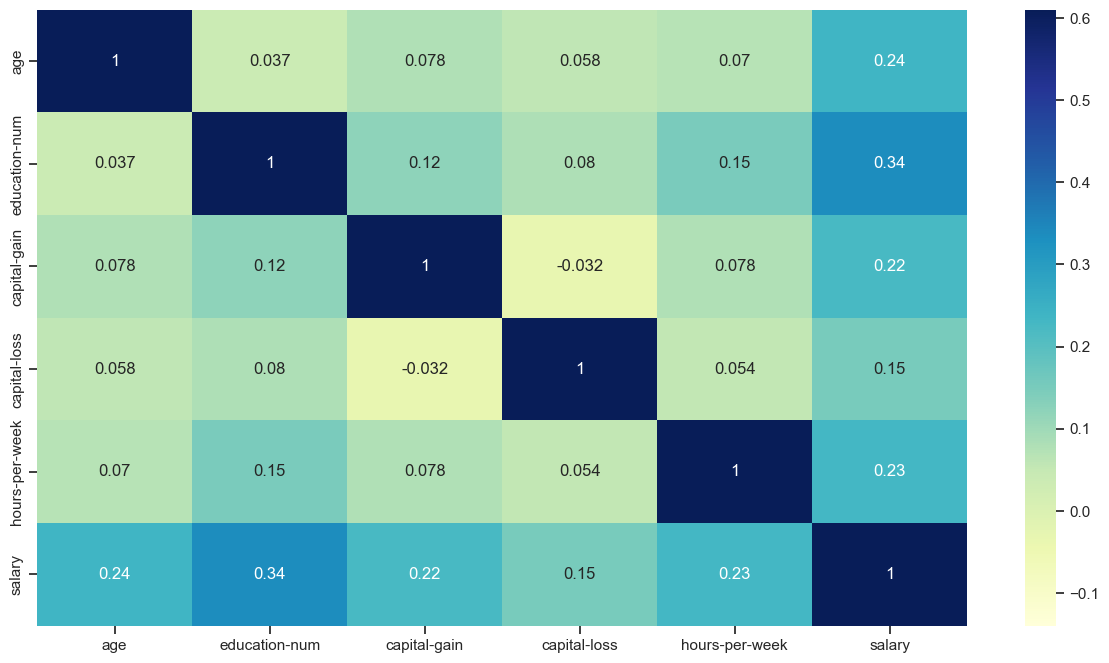

In [68]:
# checking the correlation by plotting correlation matrix
corr_matrix=data_sal.corr()
plt.subplots(figsize=(15,8))
sns.heatmap(corr_matrix,annot=True,vmin=-0.14,vmax=0.61,cmap='YlGnBu')

## Preprocessing steps

In [69]:
data_sal1 = data_sal.drop(['education-num','capital-gain','capital-loss','native-country'],axis=1)

# Encoding

# ordinal Encoding for education

In [70]:
data_sal1['education'].unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [71]:
edu = ['Preschool','1st-4th','5th-6th','7th-8th', '9th','10th','11th','12th','HS-grad','Some-college','Bachelors','Masters','Assoc-acdm',
      'Assoc-voc' ,'Prof-school' ,'Doctorate' ]

In [72]:
from sklearn.preprocessing import OrdinalEncoder

In [73]:
ordi = OrdinalEncoder(categories=[edu])

In [74]:
ordi.fit(data_sal1[['education']])

OrdinalEncoder(categories=[['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th',
                            '10th', '11th', '12th', 'HS-grad', 'Some-college',
                            'Bachelors', 'Masters', 'Assoc-acdm', 'Assoc-voc',
                            'Prof-school', 'Doctorate']])

In [75]:
data_sal1['education']

0         Bachelors
1         Bachelors
2           HS-grad
3              11th
4         Bachelors
            ...    
32556    Assoc-acdm
32557       HS-grad
32558       HS-grad
32559       HS-grad
32560       HS-grad
Name: education, Length: 32561, dtype: object

In [76]:
data_sal1['education'] = pd.DataFrame(ordi.transform(data_sal1[['education']]))

In [77]:
data_sal1['education']

0        10.0
1        10.0
2         8.0
3         6.0
4        10.0
         ... 
32556    12.0
32557     8.0
32558     8.0
32559     8.0
32560     8.0
Name: education, Length: 32561, dtype: float64

In [78]:
#ordinal encoding for occupation

In [79]:
data_sal1['education'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 32561 entries, 0 to 32560
Series name: education
Non-Null Count  Dtype  
--------------  -----  
32561 non-null  float64
dtypes: float64(1)
memory usage: 254.5 KB


In [80]:
cat_cols = data_sal1.select_dtypes(['object'])
cat_cols.head()

,workclass,marital-status,occupation,relationship,race,sex
0,State-gov,Never-married,Adm-clerical,Not-in-family,White,Male
1,Self-emp-not-inc,Married-civ-spouse,Exec-managerial,Husband,White,Male
2,Private,Divorced,Handlers-cleaners,Not-in-family,White,Male
3,Private,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male
4,Private,Married-civ-spouse,Prof-specialty,Wife,Black,Female


In [81]:
#cat_cols =cat_cols.drop(['education'],axis=1)

In [82]:
num_cols =data_sal1.drop(['workclass','education','marital-status','occupation','relationship','race','sex','salary'],axis=1)

# Label encoding

In [83]:
from sklearn.preprocessing import LabelEncoder
label_encoder= LabelEncoder()
for i in ('workclass','marital-status','occupation','relationship','race','sex'):
    data_sal1[i]=label_encoder.fit_transform(data_sal1[i])
    print(label_encoder.classes_)
data_sal1.head()

['Federal-gov' 'Local-gov' 'Never-worked' 'Private' 'Self-emp-inc'
 'Self-emp-not-inc' 'State-gov' 'Without-pay']
['Divorced' 'Married-AF-spouse' 'Married-civ-spouse'
 'Married-spouse-absent' 'Never-married' 'Separated' 'Widowed']
['Adm-clerical' 'Armed-Forces' 'Craft-repair' 'Exec-managerial'
 'Farming-fishing' 'Handlers-cleaners' 'Machine-op-inspct' 'Other-service'
 'Priv-house-serv' 'Prof-specialty' 'Protective-serv' 'Sales'
 'Tech-support' 'Transport-moving']
['Husband' 'Not-in-family' 'Other-relative' 'Own-child' 'Unmarried' 'Wife']
['Amer-Indian-Eskimo' 'Asian-Pac-Islander' 'Black' 'Other' 'White']
['Female' 'Male']


,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,salary
0,39.0,6,10.0,4,0,1,4,1,40,0
1,50.0,5,10.0,2,3,0,4,1,13,0
2,38.0,3,8.0,0,5,1,4,1,40,0
3,53.0,3,6.0,2,5,0,2,1,40,0
4,28.0,3,10.0,2,9,5,2,0,40,0


In [84]:
data_sal1.isnull().sum()

age               0
workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
hours-per-week    0
salary            0
dtype: int64

# scaling --> Normalization

In [85]:
cat_col = data_sal1.drop(['age','hours-per-week'],axis=1)

In [86]:
#importing the preprocessing library and did normalization in num_cols1
from sklearn import preprocessing
num_cols=preprocessing.normalize(num_cols)

In [87]:
#converting array to dataframe
num_cols=pd.DataFrame(num_cols,columns=['age','hours-per-week'])

In [88]:
num_cols.describe()

,age,hours-per-week
count,32561.000000,32561.000000
mean,0.669630,0.712911
std,0.140084,0.154050
min,0.188479,0.012819
25%,0.565528,0.640184
50%,0.668965,0.743294
75%,0.768221,0.824729
max,0.999918,0.982077


In [89]:
data_sal1=pd.concat([cat_col,num_cols],axis=1)
data_sal1.head()

,workclass,education,marital-status,occupation,relationship,race,sex,salary,age,hours-per-week
0,6,10.0,4,0,1,4,1,0,0.698100,0.716000
1,5,10.0,2,3,0,4,1,0,0.967823,0.251634
2,3,8.0,0,5,1,4,1,0,0.688749,0.724999
3,3,6.0,2,5,0,2,1,0,0.798189,0.602407
4,3,10.0,2,9,5,2,0,0,0.573462,0.819232


In [90]:
data_sal1 = data_sal1[['age','workclass','education','marital-status','occupation','relationship','sex','race','hours-per-week','salary']]

In [91]:
data_sal1.isnull().sum()

age               0
workclass         0
education         0
marital-status    0
occupation        0
relationship      0
sex               0
race              0
hours-per-week    0
salary            0
dtype: int64

In [92]:
#Delete the duplicates and check that it worked
data_sal1 = data_sal1.drop_duplicates(data_sal1.columns, keep='last')
sum(data_sal.duplicated(data_sal1.columns))

4726

In [93]:
data_sal1.isnull().sum()

age               0
workclass         0
education         0
marital-status    0
occupation        0
relationship      0
sex               0
race              0
hours-per-week    0
salary            0
dtype: int64

In [94]:
data_sal1.shape

(27362, 10)

## Target and Feature splitting

In [95]:
X=data_sal1.drop(['salary'], axis=1)
y=data_sal1['salary']

In [96]:
# Variance inflation factor

In [97]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif_info['Columns'] = X.columns
vif_info.sort_values('VIF', ascending = False)

,VIF,Columns
8,18.055434,hours-per-week
0,16.800949,age
7,16.709208,race
2,14.118838,education
1,7.872801,workclass
6,4.411622,sex
3,3.817780,marital-status
4,3.487744,occupation
5,2.859433,relationship


In [98]:
data_sal1

,age,workclass,education,marital-status,occupation,relationship,sex,race,hours-per-week,salary
0,0.698100,6,10.0,4,0,1,1,4,0.716000,0
1,0.967823,5,10.0,2,3,0,1,4,0.251634,0
2,0.688749,3,8.0,0,5,1,1,4,0.724999,0
3,0.798189,3,6.0,2,5,0,1,2,0.602407,0
4,0.573462,3,10.0,2,9,5,0,2,0.819232,0
...,...,...,...,...,...,...,...,...,...,...
32556,0.579207,3,12.0,2,12,5,0,4,0.815180,0
32557,0.707107,3,8.0,2,6,0,1,4,0.707107,1
32558,0.823213,3,8.0,6,0,4,0,4,0.567733,0
32559,0.739940,3,8.0,4,0,3,1,4,0.672673,0


###  train-test data split

In [99]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#smoting to balance the data

In [100]:
# salary is not balance so we have to balance the data

In [101]:
!pip install imblearn

In [102]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [103]:
counter = Counter(y_train)
print('Before',counter)
smt= SMOTE()
X_train_sm,y_train_sm=smt.fit_resample(X_train,y_train)
counter=Counter(y_train_sm)
print('After',counter)

Before Counter({0: 16736, 1: 5153})
After Counter({0: 16736, 1: 16736})


# Model Building 

#Finding accuracy for different models

#### Logistic Regression -Model1

In [104]:
from sklearn.metrics import confusion_matrix,accuracy_score, recall_score, precision_score, classification_report

In [105]:
from sklearn.metrics import plot_confusion_matrix

In [106]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg_model=log_reg.fit(X_train,y_train)
log_pred=log_reg_model.predict(X_test)
#from sklearn.metrics import confusion_matrix,accuracy_score, recall_score, precision_score, classification_report
print('confusion matrix is:\n', confusion_matrix(y_test,log_pred))
print('accuracy score is:\n', accuracy_score(y_test,log_pred))

confusion matrix is:
 [[3976  192]
 [1022  283]]
accuracy score is:
 0.7781838114379682


In [107]:
print(classification_report(y_test , log_pred))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87      4168
           1       0.60      0.22      0.32      1305

    accuracy                           0.78      5473
   macro avg       0.70      0.59      0.59      5473
weighted avg       0.75      0.78      0.74      5473



### KNN-Model 2

In [108]:
from sklearn.neighbors import KNeighborsClassifier

In [109]:
metric_k=[]
neighbors=range(3,15)

for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k)
    classifier=classifier.fit(X_train,y_train)
    y_pred_KNN=classifier.predict(X_test)
    acc=accuracy_score(y_test,y_pred_KNN)
    metric_k.append(acc)

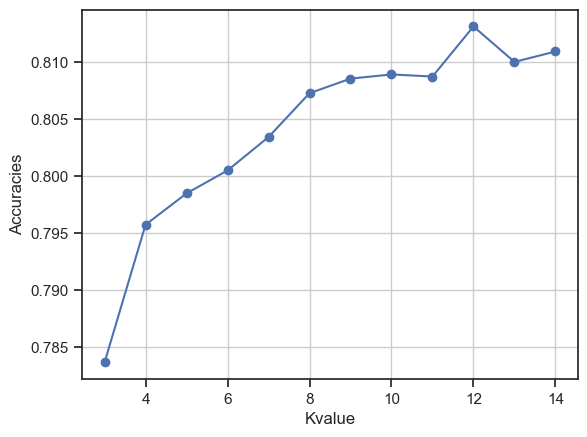

In [110]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('Kvalue')
plt.ylabel('Accuracies')
plt.grid()

In [111]:
classifier=KNeighborsClassifier(n_neighbors=12)
classifier=classifier.fit(X_train,y_train)
y_pred_KNN=classifier.predict(X_test)


In [112]:
print("Confusion matrix is :\n",confusion_matrix(y_test,y_pred_KNN))
print("Accuracy score is :\n",accuracy_score(y_test,y_pred_KNN))

Confusion matrix is :
 [[3802  366]
 [ 657  648]]
Accuracy score is :
 0.8130824045313356


In [113]:
print(classification_report(y_test , y_pred_KNN))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      4168
           1       0.64      0.50      0.56      1305

    accuracy                           0.81      5473
   macro avg       0.75      0.70      0.72      5473
weighted avg       0.80      0.81      0.80      5473



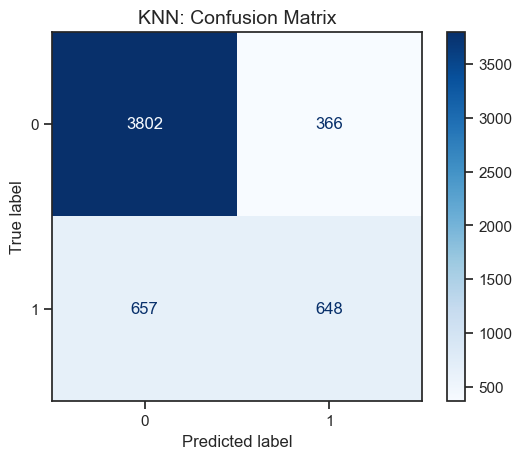

In [114]:
plot_confusion_matrix(classifier, X_test, y_test,cmap='Blues')
plt.title('KNN: Confusion Matrix', fontsize=14)
plt.show()

In [118]:
neighbors = np.arange(1, 13)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
  

In [119]:
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

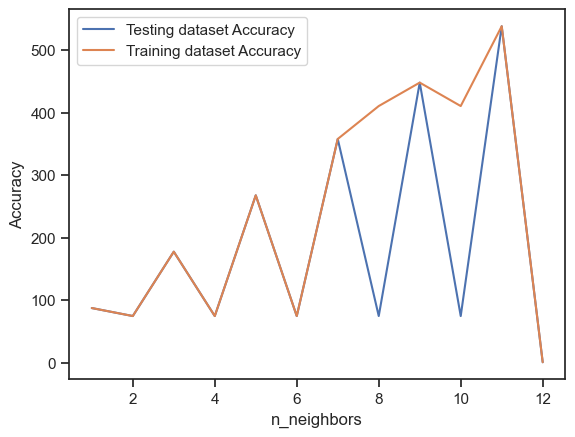

In [120]:
# Compute training and test data accuracy
train_accuracy[i] = knn.score(X_train, y_train)
test_accuracy[i] = knn.score(X_test, y_test)
  
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

### Random Forest Classifier -Model 3

In [121]:
from sklearn.ensemble import RandomForestClassifier

In [122]:
rf_clf=RandomForestClassifier()
rf_clf=rf_clf.fit(X_train,y_train)
y_pred_rf=rf_clf.predict(X_test)

In [123]:
print("Confusion Matrix is :\n\n",confusion_matrix(y_test,y_pred_rf))
print("Accuracy Score is :\n",accuracy_score(y_test,y_pred_rf))

Confusion Matrix is :

 [[3658  510]
 [ 701  604]]
Accuracy Score is :
 0.7787319568792253


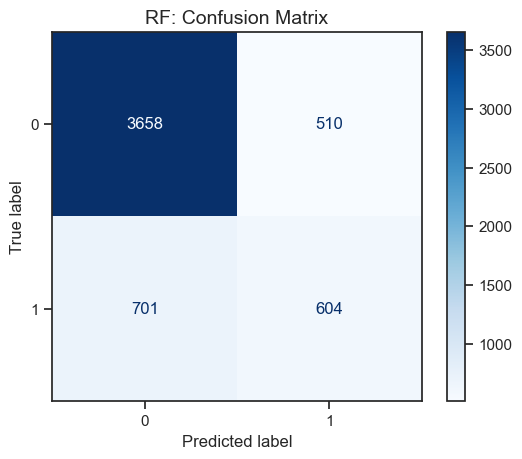

In [124]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf_clf, X_test, y_test,cmap='Blues')
plt.title('RF: Confusion Matrix', fontsize=14)
plt.show()

In [125]:
print(classification_report(y_test , y_pred_rf))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      4168
           1       0.54      0.46      0.50      1305

    accuracy                           0.78      5473
   macro avg       0.69      0.67      0.68      5473
weighted avg       0.77      0.78      0.77      5473



### SVM- Model 4

In [126]:
from sklearn.svm import SVC

In [127]:
svm_clf=SVC(kernel='rbf')
svm_model=svm_clf.fit(X_train,y_train)
svm_pred=svm_model.predict(X_test)


In [128]:
print("Confusion matrix is:\n",confusion_matrix(y_test,y_pred_rf))
print('accuracy score is:\n',accuracy_score(y_test,svm_pred))

Confusion matrix is:
 [[3658  510]
 [ 701  604]]
accuracy score is:
 0.7920701626164809


In [129]:
print(classification_report(y_test , svm_pred))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88      4168
           1       0.69      0.24      0.35      1305

    accuracy                           0.79      5473
   macro avg       0.74      0.60      0.61      5473
weighted avg       0.77      0.79      0.75      5473



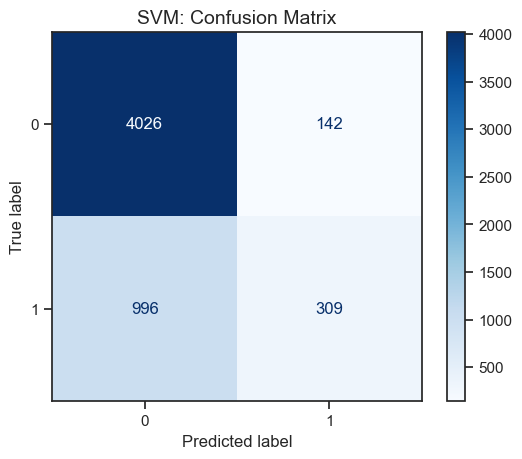

In [130]:
plot_confusion_matrix(svm_model, X_test, y_test,cmap='Blues')
plt.title('SVM: Confusion Matrix', fontsize=14)
plt.show()

### Bagging Classifier -Model 5

In [131]:
from sklearn.ensemble import BaggingClassifier
bagging=BaggingClassifier(random_state=42)
bagging_model=bagging.fit(X_train,y_train)
bagging_pred=bagging_model.predict(X_test)

In [132]:
print("Confusion Matrix is :\n",confusion_matrix(y_test,bagging_pred))
print('accuracy score is:\n',accuracy_score(y_test,bagging_pred))

Confusion Matrix is :
 [[3656  512]
 [ 745  560]]
accuracy score is:
 0.7703270601132834


In [133]:
print(classification_report(y_test , bagging_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      4168
           1       0.52      0.43      0.47      1305

    accuracy                           0.77      5473
   macro avg       0.68      0.65      0.66      5473
weighted avg       0.76      0.77      0.76      5473



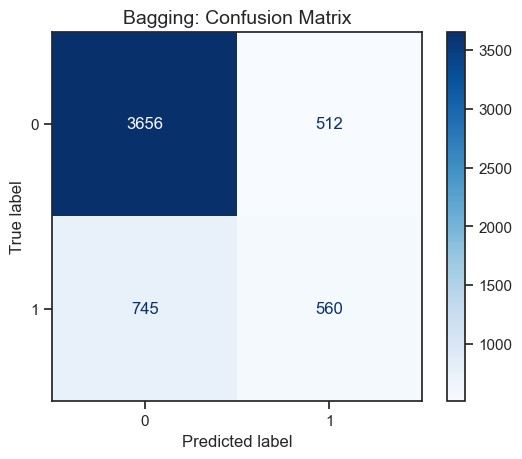

In [134]:
plot_confusion_matrix(bagging_model, X_test, y_test,cmap='Blues')
plt.title('Bagging: Confusion Matrix', fontsize=14)
plt.show()

### Ada Boost Classifier -Model 6

In [135]:
from sklearn.ensemble import AdaBoostClassifier
# adaboost classifier
abc = AdaBoostClassifier(random_state=1)
abc_model=abc.fit(X_train,y_train)
abc_pred=abc_model.predict(X_test)

In [136]:
print("Confusion Matrix is :\n",confusion_matrix(y_test,abc_pred))
print('accuracy score is:\n',accuracy_score(y_test,abc_pred))

Confusion Matrix is :
 [[3843  325]
 [ 673  632]]
accuracy score is:
 0.817650283208478


In [137]:
print(classification_report(y_test , abc_pred))

              precision    recall  f1-score   support

           0       0.85      0.92      0.89      4168
           1       0.66      0.48      0.56      1305

    accuracy                           0.82      5473
   macro avg       0.76      0.70      0.72      5473
weighted avg       0.81      0.82      0.81      5473



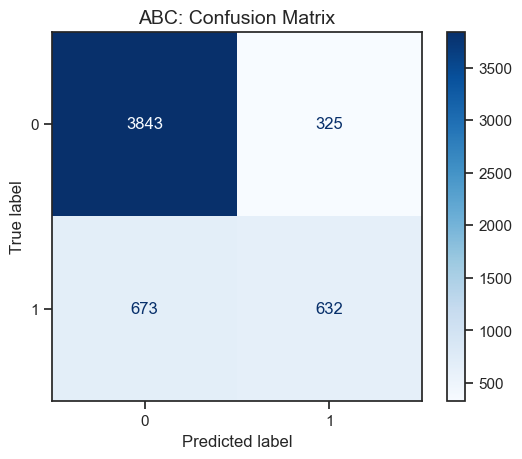

In [138]:
plot_confusion_matrix(abc_model, X_test, y_test,cmap='Blues')
plt.title('ABC: Confusion Matrix', fontsize=14)
plt.show()

### Decision Tree Classifier -Model 7

In [139]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier()
dt_clf=dt_clf.fit(X_train,y_train)
y_pred_dt=dt_clf.predict(X_test)

In [140]:
print("Confusion Matrix is :\n",confusion_matrix(y_test,y_pred_dt))
print('accuracy score is:\n',accuracy_score(y_test,y_pred_dt))

Confusion Matrix is :
 [[3497  671]
 [ 721  584]]
accuracy score is:
 0.7456605152567147


In [141]:
print(classification_report(y_test , y_pred_dt))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83      4168
           1       0.47      0.45      0.46      1305

    accuracy                           0.75      5473
   macro avg       0.65      0.64      0.65      5473
weighted avg       0.74      0.75      0.74      5473



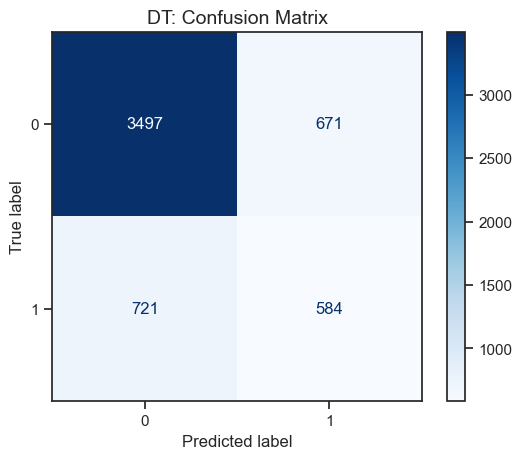

In [142]:
plot_confusion_matrix(dt_clf, X_test, y_test,cmap='Blues')
plt.title('DT: Confusion Matrix', fontsize=14)
plt.show()

### Gradient Boosting Classifier -Model 8

In [143]:
from sklearn.ensemble import GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_model=gb_classifier.fit(X_train,y_train)
gb_pred=gb_model.predict(X_test)

In [144]:
print("Confusion Matrix is :\n",confusion_matrix(y_test,gb_pred))
print('accuracy score is:\n',accuracy_score(y_test,gb_pred))

Confusion Matrix is :
 [[3826  342]
 [ 617  688]]
accuracy score is:
 0.8247761739448201


In [145]:
print(classification_report(y_test , gb_pred))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      4168
           1       0.67      0.53      0.59      1305

    accuracy                           0.82      5473
   macro avg       0.76      0.72      0.74      5473
weighted avg       0.82      0.82      0.82      5473



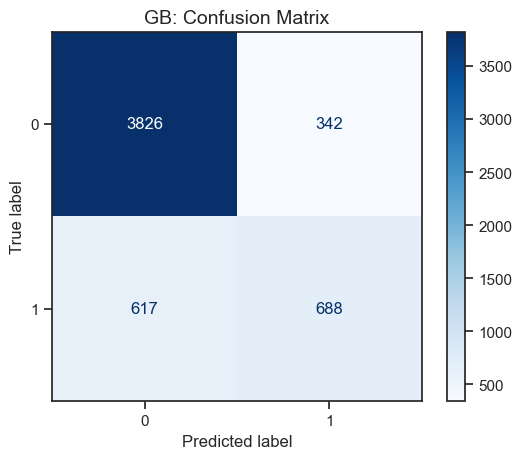

In [146]:
plot_confusion_matrix(gb_model, X_test, y_test,cmap='Blues')
plt.title('GB: Confusion Matrix', fontsize=14)
plt.show()

### XGBoost Classifier -Model 9

In [147]:
#!pip install xgboost

In [148]:
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier(random_state=42, eval_metric='logloss')
xgb_model=xgb_classifier.fit(X_train,y_train)
xgb_pred=xgb_model.predict(X_test)

In [149]:
print("Confusion Matrix is :\n",confusion_matrix(y_test,xgb_pred))
print('accuracy score is:\n',accuracy_score(y_test,xgb_pred))

Confusion Matrix is :
 [[3783  385]
 [ 576  729]]
accuracy score is:
 0.8244107436506486


In [150]:
print(classification_report(y_test , xgb_pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89      4168
           1       0.65      0.56      0.60      1305

    accuracy                           0.82      5473
   macro avg       0.76      0.73      0.75      5473
weighted avg       0.82      0.82      0.82      5473



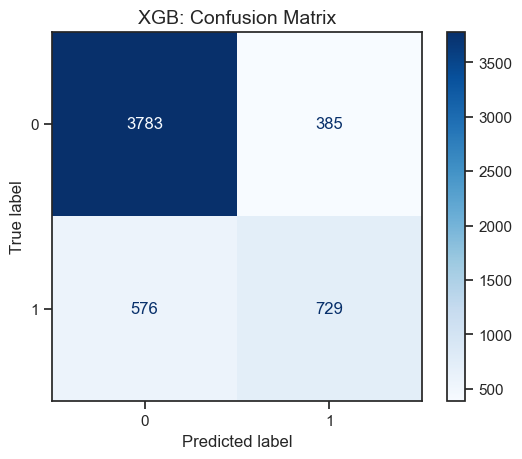

In [146]:
plot_confusion_matrix(xgb_model, X_test, y_test,cmap='Blues')
plt.title('XGB: Confusion Matrix', fontsize=14)
plt.show()

In [151]:
from tabulate import tabulate

In [152]:
table = [['Model', 'Accuracy'], ['Logistic Regression', accuracy_score(y_test,log_pred)], 
         ['KNN',accuracy_score(y_test , y_pred_KNN)],['Random Forest',accuracy_score(y_test,y_pred_rf)]
       ,["SVM",accuracy_score(y_test,svm_pred)],
         ['Bagging',accuracy_score(y_test,bagging_pred)],['ADA Boost',accuracy_score(y_test,abc_pred)],
         ['Decision tree',accuracy_score(y_test,y_pred_dt)],['Gradient Boost',accuracy_score(y_test,gb_pred)], 
         ['XGB',accuracy_score(y_test,xgb_pred)]]
print(tabulate(table,headers='firstrow',tablefmt='fancy_grid'))

╒═════════════════════╤════════════╕
│ Model               │   Accuracy │
╞═════════════════════╪════════════╡
│ Logistic Regression │   0.778184 │
├─────────────────────┼────────────┤
│ KNN                 │   0.813082 │
├─────────────────────┼────────────┤
│ Random Forest       │   0.778732 │
├─────────────────────┼────────────┤
│ SVM                 │   0.79207  │
├─────────────────────┼────────────┤
│ Bagging             │   0.770327 │
├─────────────────────┼────────────┤
│ ADA Boost           │   0.81765  │
├─────────────────────┼────────────┤
│ Decision tree       │   0.745661 │
├─────────────────────┼────────────┤
│ Gradient Boost      │   0.824776 │
├─────────────────────┼────────────┤
│ XGB                 │   0.824411 │
╘═════════════════════╧════════════╛


## Hyper parameter Tuning

In [149]:
from scipy import stats
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

### Hyper parameter tuning for Gradient Boosting Classifier

In [150]:
#hyper parameter 1

In [203]:
model=GradientBoostingClassifier()
parameters = {'learning_rate': [0.011,0.1,0.2,0.21,0.3],
            'n_estimators' : [5,50,250,500,1000,1250,1500,1750],
             'max_depth':[1,3,5,7,9]}

In [204]:
randm = RandomizedSearchCV(estimator=model,param_distributions=parameters,
                          cv=2,n_iter= 10, n_jobs =-1)
randm.fit(X_train,y_train)

RandomizedSearchCV(cv=2, estimator=GradientBoostingClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.011, 0.1, 0.2, 0.21,
                                                          0.3],
                                        'max_depth': [1, 3, 5, 7, 9],
                                        'n_estimators': [5, 50, 250, 500, 1000,
                                                         1250, 1500, 1750]})

In [205]:
print("Results from random Search  \n")
print("\n The best estimator across All searched params :\n",randm.best_estimator_)
print("\n The best Score across All searched params :\n",randm.best_score_)
print("\n The best parameters across All searched params :\n",randm.best_params_)

Results from random Search  


 The best estimator across All searched params :
 GradientBoostingClassifier(learning_rate=0.2, max_depth=1, n_estimators=1750)

 The best Score across All searched params :
 0.8263055625682907

 The best parameters across All searched params :
 {'n_estimators': 1750, 'max_depth': 1, 'learning_rate': 0.2}


In [206]:
gb_classifier_h = GradientBoostingClassifier(n_estimators= 1750, max_depth= 1, learning_rate = 0.2)
gb_model_h=gb_classifier_h.fit(X_train,y_train)
gb_pred_h=gb_model_h.predict(X_test)

In [207]:
#print("Confusion Matrix is :\n",confusion_matrix(y_test,gb_pred_h))
print('accuracy score is:\n',accuracy_score(y_test,gb_pred_h))

accuracy score is:
 0.8262378951215056


### Hyper Parameter Tuning for XGB classifier

In [164]:
classifier =XGBClassifier()
parameters_x = {
 'learning_rate' : [0.05,0.055,0.55,0.15,0.20,0.25,0.30,0.35],
 'max_depth' : [1,2,3, 4, 5, 6,7, 8, 10, 12, 15],
 'min_child_weight': [1, 3, 5, 7],
 'gamma': [ 0.0, 0.1, 0.2 , 0.3, 0.4,0.5,10 ],
 'colsample_bytree' : [ 0.3, 0.4, 0.5 ,0.7]
}

In [165]:
randm_XGB=RandomizedSearchCV(classifier,param_distributions=parameters_x,n_iter=5,scoring='accuracy',n_jobs=-1,cv=5,verbose=3)
randm_XGB.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           n_estimators=100, n_jobs=None,
                     

In [166]:
print("the best estimator across all searched params:",randm_XGB.best_estimator_)

the best estimator across all searched params: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)


In [167]:
print("The best score across all searched params:\n",randm_XGB.best_score_)

The best score across all searched params:
 0.8277218647707143


In [168]:
print("The best parameters across all searched params:",randm_XGB.best_params_)

The best parameters across all searched params: {'min_child_weight': 7, 'max_depth': 3, 'learning_rate': 0.3, 'gamma': 0.3, 'colsample_bytree': 0.3}


In [169]:
xgb_clf=XGBClassifier(min_child_weight=7,max_depth=3,learning_rate=0.3,gamma=0.3,colsample_bytree=0.3)
xgb_clf.fit(X_train,y_train)
y_pred_xgb=xgb_clf.predict(X_test)

In [170]:
print("Accuracy after hyper parameter tuning : XGB :",accuracy_score(y_test,y_pred_xgb))

Accuracy after hyper parameter tuning : XGB : 0.8282477617394483


After Hyperparameter Tuning accuracy is improved,Gradient-82.6 & XGB-82.8

In [208]:
py_flask=XGBClassifier()
py_flask.fit(X,y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [209]:
#saving model
import pickle
pickle.dump(py_flask,open('flask_xgb_model1.pkl',"wb"))


In [210]:
py_flask=GradientBoostingClassifier()
py_flask.fit(X,y)

GradientBoostingClassifier()

In [211]:
#saving model
import pickle
pickle.dump(py_flask,open('flask_gb_model1.pkl',"wb"))
